Paso 1. Cargar el archivo y librerias

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene, ttest_ind

games = pd.read_csv('games.csv')

Paso 2. Preparacion de los datos

In [310]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [311]:
games_columns = games.columns
print(games_columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [312]:
games_columns = [name.lower() for name in games_columns]
games.columns = games_columns
games.info() #comprobacion de la modificacion en el nombre de las columnas

# MODIFIQUE EL NOMBRE DE LAS COLUMNAS PARA QUE SEA MAS LEGIBLE AL MOMENTO DE LEER LOS DATOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [313]:
print(games)
print(games['year_of_release'].sample(50))

# SAQUE UNA MUESTRA PARA PODER VER COMO SUSTITUIR LOS VALORES AUSENTES EN LA COLUMNA

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [314]:
year_mode = games['year_of_release'].mode()[0]
print(year_mode)
games['year_of_release'].fillna(year_mode,inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()

# MODIFIQUE LOS VALORES AUSENTES POR EL VALOR QUE MAS SE REPITE (MODA) Y LOS CONVERTI A TIPO ENTERO, PORQUE ES EL MEJOR TIPO DE DATO PARA TRABAJAR HABLANDO DE AÑOS (VALORES DISCRETOS). ADEMAS, USE LA MODA PORQUE USAR LA MEDIA NOS DARIA UN VALOR IRREAL AL DAR VALORES DECIMALES, LA MEDIANA PODRIA SELECCIONAR UN AÑO CON POCOS LANZAMIENTOS Y USAR LA MODA MANTIENE LA INTEGRIDAD DE LOS DATOS Y NOS PODRIA MOSTRAR UN PICO HISTORICO EN CASO DE QUE OTROS JUEGOS HAYAN SIDO LANZADOS ESE MISMO AÑO.

2008.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


C:\Users\manue\AppData\Local\Temp\ipykernel_11912\2646585367.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['year_of_release'].fillna(year_mode,inplace=True)


In [315]:
games['critic_score'] = pd.to_numeric(games['critic_score'],errors='coerce')
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')
crit_score = games[games['critic_score'].notna()]['critic_score']
user_score = games[games['user_score'].notna()]['user_score']

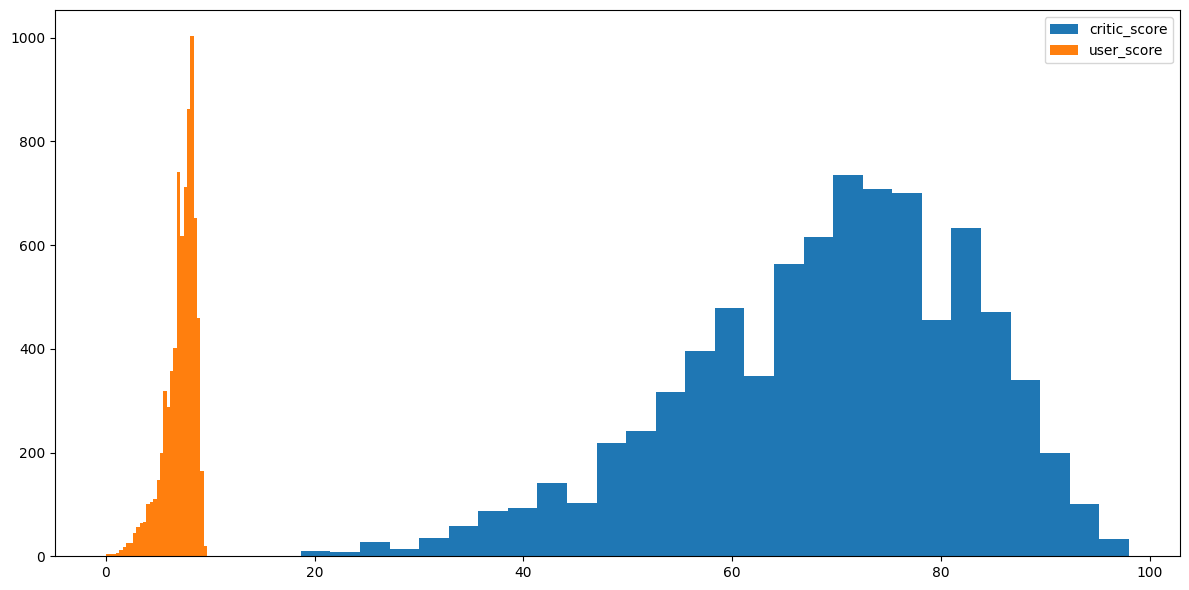

In [316]:
plt.figure(figsize=(12,6))
plt.hist(crit_score, label='critic_score', bins=30)
plt.hist(user_score, label='user_score', bins=30)
plt.legend()
plt.tight_layout()
plt.show()

El grafico se utilizo como referencia para poder decidir si usar la media o mediana para rellenar los datos ausentes.
- La distribucion parece simetrica en critic_score y lo mas razonable seria usar el promedio (media), porque las criticas suelen seguir una distribucion normal en juegos bien evaluados y la media preserva el valor central.
- La distribucion en user_score indica que estan sesgados los datos o que tiene outliers (datos atipicos), se usara la mediana, debido a la polaridad de los votos de los usuarios, pueden haber haters que votan 0/10 o 10/10 para los fans, por lo que se podria distorsionar la media de manera artificial.

In [317]:
games['critic_score'].fillna(games['critic_score'].mean(),inplace=True)
games['user_score'].fillna(games['user_score'].median(),inplace=True)
games.info()
print(games.sample(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
                                                    name platform  \
7269                         Yoshi Touch & Go (JP sales)       DS   
1915                                      Call of Duty 3      PS2   
6702                    

C:\Users\manue\AppData\Local\Temp\ipykernel_11912\2341522980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['critic_score'].fillna(games['critic_score'].mean(),inplace=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11912\2341522980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [318]:
# Rellenamos los datos faltantes

games['name'].fillna('unknown',inplace=True)
games['genre'].fillna('unknown',inplace=True)
games['rating'].fillna('unknown',inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


C:\Users\manue\AppData\Local\Temp\ipykernel_11912\2689572529.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['name'].fillna('unknown',inplace=True)
C:\Users\manue\AppData\Local\Temp\ipykernel_11912\2689572529.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [319]:
games['rating'] = games['rating'].astype('category')
games.info()
print(games.sample(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16715 non-null  int64   
 3   genre            16715 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     16715 non-null  float64 
 9   user_score       16715 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 1.3+ MB
                                                    name platform  \
7228                              All-Star Baseball 2002       GC   
10297                                        NBA Live 16     XOne  

La columna year_of release se convirtió a tipo entero (int) para garantizar un manejo preciso y eficiente de los años, ya que:
- Los años son valores discretos (sin decimales).
- Las operaciones aritméticas y filtros son más rápidas con enteros.
- Evita errores en análisis temporales (ej.: agrupaciones por año).

La columna rating se modifico a un tipo category para
- Optimizar la memoria
- Acelerar operaciones
- Controlar el orden

In [320]:
# BUSCAMOS VALORES DUPLICADOS
print(games.duplicated().sum())

0


In [321]:
ventas_totales = games[['eu_sales','jp_sales','na_sales','other_sales']].sum().sum()
print(f"Ventas totales de EU, NA, JP y other: {ventas_totales}")

Ventas totales de EU, NA, JP y other: 8915.710000000001


In [322]:
games['sales_per_platform'] = games.groupby('name')[['eu_sales','jp_sales','na_sales','other_sales']].transform('sum').sum(axis=1)
print(games[['name','sales_per_platform']])

                                name  sales_per_platform
0                         Wii Sports               82.54
1                  Super Mario Bros.               45.31
2                     Mario Kart Wii               35.52
3                  Wii Sports Resort               32.77
4           Pokemon Red/Pokemon Blue               31.38
...                              ...                 ...
16710  Samurai Warriors: Sanada Maru                0.05
16711               LMA Manager 2007                0.01
16712        Haitaka no Psychedelica                0.01
16713               Spirits & Spells                0.02
16714            Winning Post 8 2016                0.03

[16715 rows x 2 columns]


In [323]:
games.rename(columns={'sales_per_platform':'sales_per_name'},inplace=True)
print(games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

Paso 3. Analisis de datos

In [324]:
games_per_year = games.groupby('year_of_release')['name'].count().reset_index(name='total_games')
print(games_per_year)

    year_of_release  total_games
0              1980            9
1              1981           46
2              1982           36
3              1983           17
4              1984           14
5              1985           14
6              1986           21
7              1987           16
8              1988           15
9              1989           17
10             1990           16
11             1991           41
12             1992           43
13             1993           62
14             1994          121
15             1995          219
16             1996          263
17             1997          289
18             1998          379
19             1999          338
20             2000          350
21             2001          482
22             2002          829
23             2003          775
24             2004          762
25             2005          939
26             2006         1006
27             2007         1197
28             2008         1696
29        

1980 - 1993: era temprana (epoca de desarrollo):
- volumenes bajos: min de 9, max de 62.

1994 - 2006: Expansion, primeras consolas (playstation, xbox, wii)
- crecimiento de 121 a 1006

2007 - 2011: maximo historico
- Apogeo del xbox360, playstation3 y wii
- Pico historico en el 2008 con 1696 juegos

2012 - 2015: reduccion de desarrollo / declive
- Transicion de consolas playstation4, xboxOne

In [325]:
sales_per_platform = games.groupby('platform')[['eu_sales','jp_sales','na_sales','other_sales']].sum()
sales_per_platform['total_sales'] = sales_per_platform.sum(axis=1)
sales_per_platform = sales_per_platform.sort_values('total_sales',ascending=False)
print(sales_per_platform)

          eu_sales  jp_sales  na_sales  other_sales  total_sales
platform                                                        
PS2         339.29    139.20    583.84       193.44      1255.77
X360        270.76     12.43    602.47        85.76       971.42
PS3         330.29     80.19    393.49       135.68       939.65
Wii         262.21     69.33    496.90        79.07       907.51
DS          188.89    175.57    382.40        59.26       806.12
PS          213.61    139.82    336.52        40.91       730.86
GBA          75.25     47.33    187.54         7.73       317.85
PS4         141.09     15.96    108.74        48.35       314.14
PSP          66.68     76.78    109.17        41.42       294.05
PC          142.44      0.17     94.53        22.38       259.52
3DS          61.48    100.67     83.49        13.36       259.00
XB           60.95      1.38    186.69         8.72       257.74
GB           47.82     85.12    114.32         8.20       255.46
NES          21.15     98

<Axes: xlabel='Platform', ylabel='Sales'>

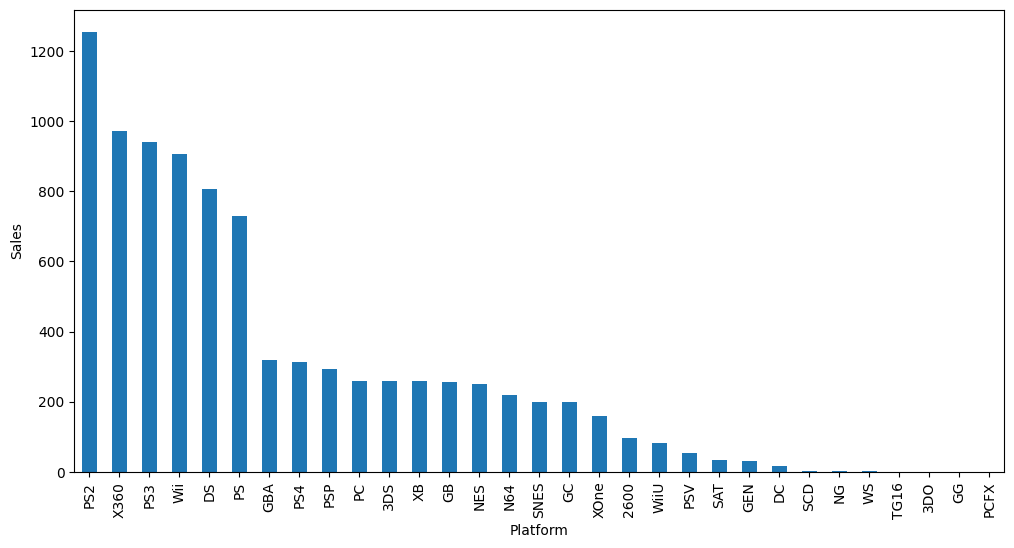

In [326]:
sales_per_platform['total_sales'].plot(
    kind='bar',
    figsize=(12,6),
    xlabel='Platform',
    ylabel='Sales'
)

In [327]:
sales_per_platform_year = games.groupby(['platform','year_of_release'])[['eu_sales','jp_sales','na_sales','other_sales']].sum()
sales_per_platform_year['total_sales'] = sales_per_platform_year.sum(axis=1)
sales_per_platform_year = sales_per_platform_year.sort_values('total_sales',ascending=False)
sales_per_platform_year = sales_per_platform_year.reset_index()
print(sales_per_platform_year.head(50))

   platform  year_of_release  eu_sales  jp_sales  na_sales  other_sales  \
0       PS2             2004     56.01     19.17     96.78        39.85   
1       Wii             2009     58.31     16.57    114.55        17.54   
2       PS2             2002     65.27     21.85     96.54        21.72   
3       Wii             2008     50.41     13.74    107.15        16.35   
4       PS2             2003     61.20     18.88     83.54        20.69   
5      X360             2010     46.31      2.11    107.38        14.23   
6        PS             1998     48.74     28.48     83.22         9.05   
7       PS2             2001     52.37     17.79     79.49        16.78   
8       PS2             2005     40.86     15.05     85.60        19.15   
9       PS3             2011     56.24     14.10     64.88        21.56   
10      Wii             2007     43.96     12.12     83.14        13.55   
11       DS             2008     32.72     24.56     80.21        11.16   
12       DS             2

<Axes: title={'center': 'Ventas por año'}, xlabel='Año', ylabel='Sales'>

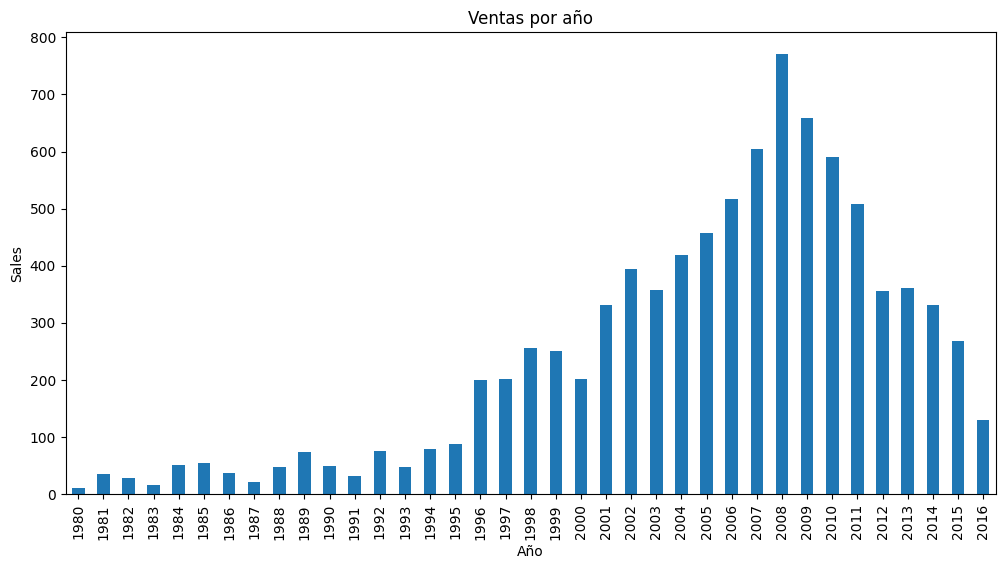

In [328]:
sales_per_platform_year.groupby('year_of_release')['total_sales'].sum().plot(
    kind='bar',
    figsize=(12,6),
    xlabel='Año',
    ylabel='Sales',
    title='Ventas por año'
)


<Axes: title={'center': 'Ventas por plataforma'}, xlabel='Platform', ylabel='Sales'>

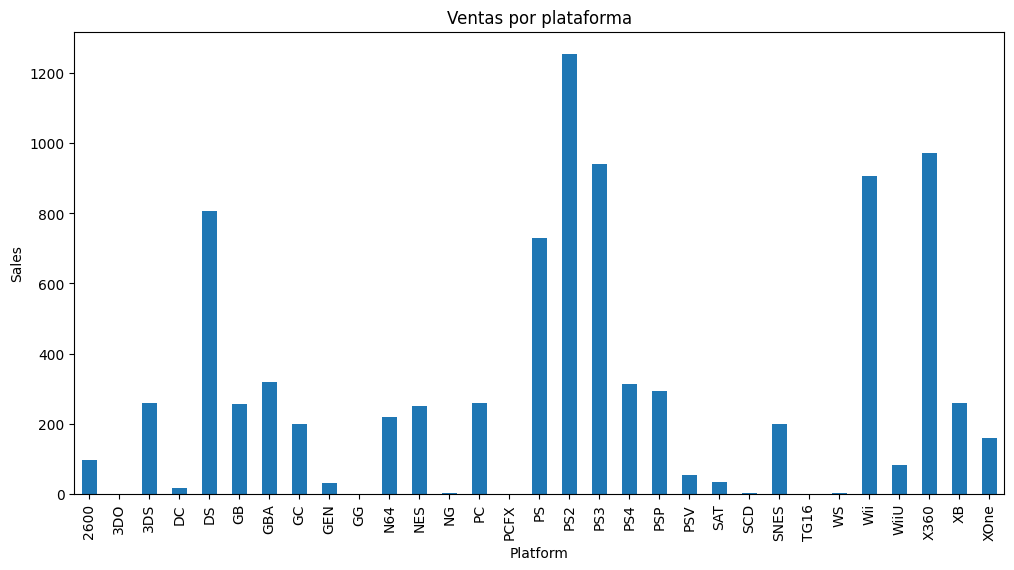

In [329]:
sales_per_platform_year.groupby('platform')['total_sales'].sum().plot(
    kind='bar',
    figsize=(12,6),
    xlabel='Platform',
    ylabel='Sales',
    title='Ventas por plataforma'
)

In [330]:
top10_sales = (
    sales_per_platform_year.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

<Axes: title={'center': 'Top 10 de plataformas con mayor ventas totales'}, xlabel='Platform', ylabel='Sales'>

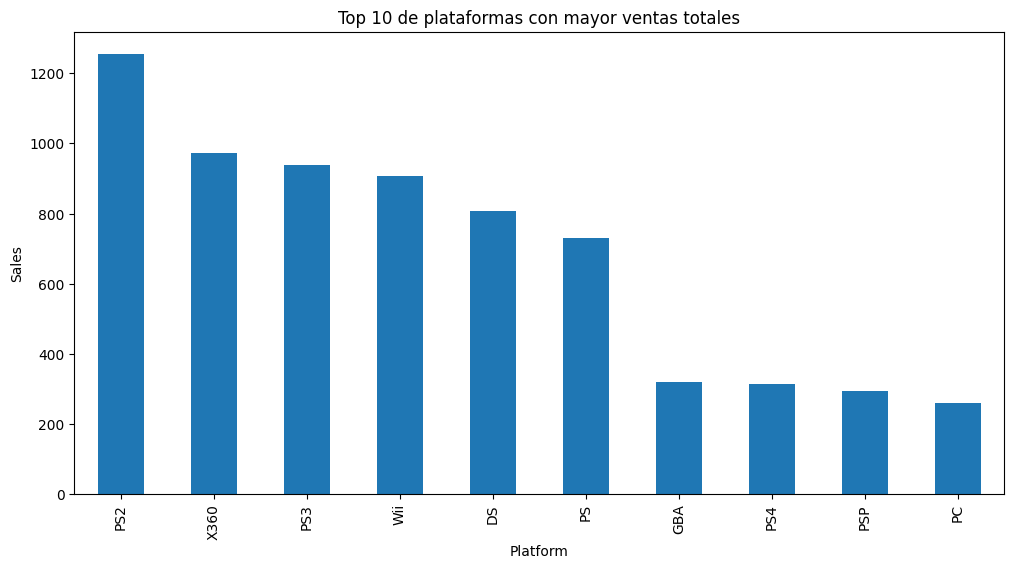

In [331]:
top10_sales.plot(
    kind='bar',
    figsize=(12,6),
    xlabel='Platform',
    ylabel='Sales',
    title='Top 10 de plataformas con mayor ventas totales'
)

In [332]:
top3_per_year = (
    sales_per_platform_year
    .sort_values(['year_of_release', 'total_sales'], ascending=[True, False])
    .groupby('year_of_release')
    .head(3)
    .reset_index(drop=True)
)
top3_per_year = top3_per_year.sort_values(by='year_of_release',ascending=False)
print(top3_per_year.head(51))

    platform  year_of_release  eu_sales  jp_sales  na_sales  other_sales  \
99      XOne             2016      9.63      0.01     14.27         2.24   
100      3DS             2016      2.33      8.03      4.14         0.64   
98       PS4             2016     31.78      5.74     21.49        10.24   
96      XOne             2015     18.47      0.17     36.03         5.47   
97       3DS             2015      5.06     15.52      6.17         1.03   
95       PS4             2015     51.76      6.31     42.37        18.46   
92       PS4             2014     46.50      2.97     34.75        15.78   
93      XOne             2014     18.15      0.14     30.97         4.81   
94       PS3             2014     18.24      6.25     16.39         6.88   
90      X360             2013     27.03      0.43     53.36         7.76   
89       PS3             2013     42.27     12.13     41.45        17.40   
91       3DS             2013     14.84     23.57     15.56         2.60   
87      X360

Basandonos en un periodo del 2000 al 2016, considerando las 3 consolas mas vendidas por año:
- PS y PS2, dominaron el mercado entre 2000 y 2002. Sin embargo, para 2002, la PS original perdió relevancia y la PS2 se consolidó como la favorita.
- La PS2 siguió fuerte hasta 2006, pero en 2007 se dio una transición importante: el Wii, junto con el Xbox360 y el DS, se posicionaron como los más vendidos. Es decir, la PS2 tuvo un ciclo de aproximadamente 6 años desde su lanzamiento hasta que dejó de estar entre las top 3.
- El Xbox 360 ganó protagonismo a partir de 2007, aunque su declive comenzó hacia 2014, después del lanzamiento del Xbox One en 2013. Su periodo de mayor presencia, considerando solo el tiempo en el top 3, fue de unos 6 años, aunque su lanzamiento fue en 2005 y no entró de inmediato al ranking.
- El Wii tuvo un ciclo de vida más corto en el top 3: unos 3 años de presencia fuerte antes de empezar a caer después de 2010. Algo similar sucedió con el DS, que fue reemplazado por el 3DS y perdió fuerza tras la llegada del PS3 en 2009.
- En general, los periodos de transición entre consolas principales suelen durar entre 3 y 6 años. Este cálculo se basa en el tiempo que cada consola se mantiene entre las tres más vendidas, sin tomar en cuenta la fecha exacta de lanzamiento, sino el momento en que realmente logran posicionarse en el top.


In [333]:
relevant_years = sales_per_platform_year[sales_per_platform_year['year_of_release'] > 2010]
print(relevant_years)

    platform  year_of_release  eu_sales  jp_sales  na_sales  other_sales  \
9        PS3             2011     56.24     14.10     64.88        21.56   
15      X360             2011     42.58      1.78     86.75        12.73   
26       PS4             2015     51.76      6.31     42.37        18.46   
27       PS3             2013     42.27     12.13     41.45        17.40   
28       PS3             2012     39.05     11.94     39.88        16.49   
30       PS4             2014     46.50      2.97     34.75        15.78   
31      X360             2012     32.00      1.06     58.39         8.29   
35      X360             2013     27.03      0.43     53.36         7.76   
42       PS4             2016     31.78      5.74     21.49        10.24   
45       3DS             2011     18.63     12.83     27.34         4.40   
47      XOne             2015     18.47      0.17     36.03         5.47   
48       Wii             2011     17.68      5.58     31.11         5.28   
51       3DS

In [334]:
def calculo_umbral_exito(data,platform, col_sales='total_sales'):
    juegos = data[data['platform'] == platform]
    umbral_exito = juegos[col_sales].quantile(0.75)
    return umbral_exito

In [335]:
plataformas = relevant_years['platform'].unique()
print(plataformas)
umbrales = {platform: calculo_umbral_exito(relevant_years, platform) for platform in plataformas}
for (plataforma, umbral) in umbrales.items():
    print(f"{plataforma} tiene que vender {float(umbral):.2f}M para 2017.")
print("'ESTOS DATOS SE BASAN EN EL HISTORICO DEL 2010 AL 2016'")

['PS3' 'X360' 'PS4' '3DS' 'XOne' 'Wii' 'PC' 'DS' 'WiiU' 'PSP' 'PSV' 'PS2']
PS3 tiene que vender 111.78M para 2017.
X360 tiene que vender 96.95M para 2017.
PS4 tiene que vender 104.72M para 2017.
3DS tiene que vender 55.27M para 2017.
XOne tiene que vender 55.59M para 2017.
Wii tiene que vender 18.43M para 2017.
PC tiene que vender 20.73M para 2017.
DS tiene que vender 18.59M para 2017.
WiiU tiene que vender 21.65M para 2017.
PSP tiene que vender 7.69M para 2017.
PSV tiene que vender 11.57M para 2017.
PS2 tiene que vender 0.45M para 2017.
'ESTOS DATOS SE BASAN EN EL HISTORICO DEL 2010 AL 2016'


   platform  umbral
0       3DS  257.81
1        DS   38.73
2        PC   97.68
3       PS2    0.45
4       PS3  445.57
5       PS4  314.14
6       PSP   29.01
7       PSV   53.81
8       Wii   95.02
9      WiiU   82.19
10     X360  380.38
11     XOne  159.32


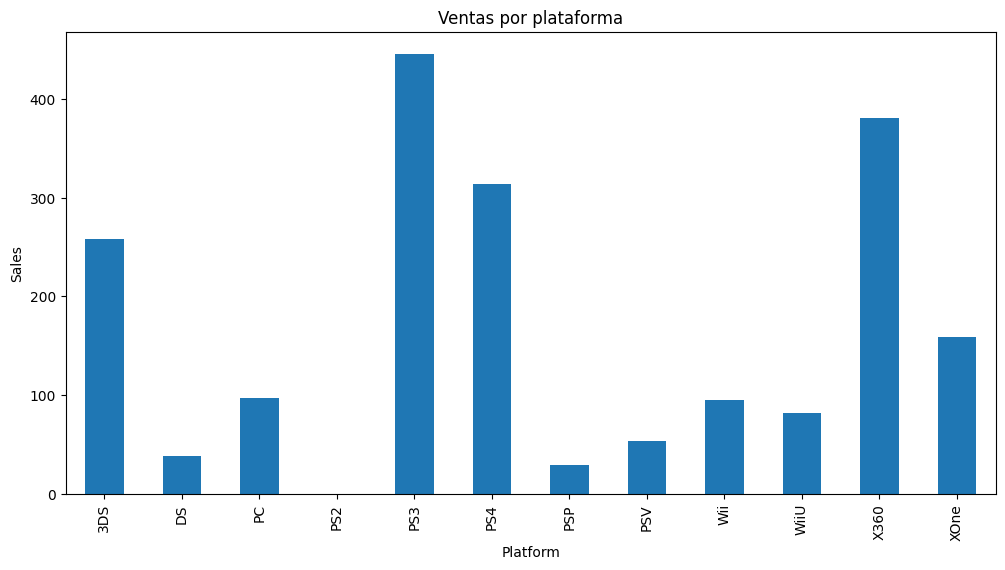

In [336]:
relevant_years.groupby('platform')['total_sales'].sum().plot(
    kind='bar',
    figsize=(12,6),
    xlabel='Platform',
    ylabel='Sales',
    title='Ventas por plataforma'
)
print(relevant_years.groupby('platform')['total_sales'].sum().reset_index(name='umbral'))

Según los datos del 2010 al 2016, las plataformas lideres son:
1. PS3
2. XBOX360
3. PS4
4. 3DS
5. XBOX ONE

Plataformas que van en declive:
- PS3, a pesar de que tiene un umbral alto (445.57), con el lanzamiento del PS4, empezara a decar.
- XBOX360, siendo el segundo umbral mas alto (380.38), tambien va a decaer con el lanzamiento del XBOX ONE.

Plataformas que van en crecimiento:
- PS4, teniendo un umbral de exito de 314.14, tiene mejor prediccion para 2017 que el PS3.
- XBOX ONE, despues de su lanzamiento en el 2013, tiene un umbral de exito de 159.32, que aunque no es alto, tiene una mejor estimacion para el 2017 que para el XBOX360.
- 3DS, teniendo un umbral de ~257, tiene un nicho portable, y lo que necesita vender para 2017 es baja.

Las plataformas mas rentables son:
- PS4, XBOX ONE y 3DS

Observaciones:
- Aunque xbox one requiere un numero menor en ventas vs PS4, el PS4 tiene mejor potencial para generar ingresos.
- 3DS no tiene competencia directa al estar enfocado a un publico en especifico.



Text(0, 0.5, 'Global sales')

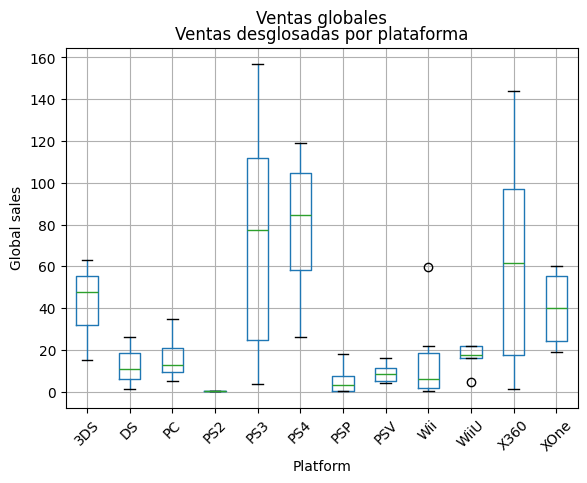

In [337]:
relevant_years.boxplot(column='total_sales', by='platform', rot=45)
plt.title('Ventas desglosadas por plataforma')
plt.suptitle('Ventas globales')
plt.xlabel('Platform')
plt.ylabel('Global sales')

In [338]:
# Para entender mejor, veamos los numeros
relevant_years.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,6.0,42.968333,18.278261,15.14,31.7750,47.560,55.2675,63.20
DS,3.0,12.910000,12.429397,1.54,6.2750,11.010,18.5950,26.18
PC,6.0,16.280000,11.007403,5.25,9.4850,12.830,20.7350,35.03
PS2,1.0,0.450000,NaN,0.45,0.4500,0.450,0.4500,0.45
PS3,6.0,74.261667,60.695667,3.60,24.5550,77.560,111.7775,156.78
PS4,4.0,78.535000,40.567917,25.99,58.4350,84.625,104.7250,118.90
PSP,5.0,5.802000,7.387558,0.12,0.2400,3.140,7.6900,17.82
PSV,6.0,8.968333,4.729695,4.25,5.0350,8.420,11.5725,16.19
Wii,6.0,15.836667,22.864073,0.18,1.7925,6.170,18.4300,59.65


Hallazgos:
- PS3 y PS4 tienen las ventas promedio mas altas (~~74 y ~~78.5, respectivamente), seguido del XBOX360 (~~63 en promedio).
- Su desviacion estandard del PS3 (~~60), indicaria que tiene juegos que se venden mas que otros, tiene mucha variabilidad, al igual que el XBOX360 (~~56).
- Las otras plataformas tienen una variabilidad mas estables, la PSV y WiiU son las que tienen menos variabilidad, pero sus maximos en ventas son las mas bajas.
- PS2 no tiene datos suficientes para poder ser analizado, esto se entenderia que estaba en su etapa de declive.
- El PS3 y XBOX360 tienen una dispersion muy alta, indicaria que tuvieron titulos muy exitosos
- Wii y WiiU muestran valores atipicos, mientras que el Wii tiene un valor atipico alto, indicaria que tuvo juegos que se vendieron mas de lo esperado, mientras que el WiiU indicaria que tuvo titulos que se vendieron muy poco, menos de lo esperado, a pesar de tener ventas promedio mas altas que el Wii, las ventas maximas del Wii son 2 veces mayores.

In [339]:
reseñas = games.groupby(['user_score','critic_score','platform'])[['eu_sales','jp_sales','na_sales']].sum()
reseñas['total_sales'] = reseñas[['eu_sales','na_sales','jp_sales']].sum(axis=1)
print(reseñas)

                                  eu_sales  jp_sales  na_sales  total_sales
user_score critic_score platform                                           
0.0        68.967679    DS            0.00      0.00      0.66         0.66
0.2        68.967679    PS3           0.02      0.00      0.07         0.09
                        Wii           0.00      0.00      0.04         0.04
0.3        68.967679    DS            0.01      0.00      0.27         0.28
                        Wii           0.00      0.00      0.04         0.04
...                                    ...       ...       ...          ...
9.5        83.000000    GBA           0.02      0.00      0.06         0.08
           86.000000    GBA           0.27      0.27      0.61         1.15
9.6        81.000000    GBA           0.13      0.11      0.34         0.58
           83.000000    GBA           0.04      0.00      0.10         0.14
9.7        68.967679    PSP           0.02      0.00      0.00         0.02

[6354 rows 

In [340]:
reseñas = reseñas.reset_index()
matriz_corr = reseñas.groupby('platform')[['user_score','critic_score','eu_sales','na_sales','jp_sales','total_sales']].corr(method='pearson')
print(matriz_corr.loc['PS4'])

              user_score  critic_score  eu_sales  na_sales  jp_sales  \
user_score      1.000000      0.549375  0.012859  0.028798  0.064983   
critic_score    0.549375      1.000000  0.154207  0.143068  0.043703   
eu_sales        0.012859      0.154207  1.000000  0.948754  0.918295   
na_sales        0.028798      0.143068  0.948754  1.000000  0.949775   
jp_sales        0.064983      0.043703  0.918295  0.949775  1.000000   
total_sales     0.025103      0.140602  0.987257  0.985896  0.955314   

              total_sales  
user_score       0.025103  
critic_score     0.140602  
eu_sales         0.987257  
na_sales         0.985896  
jp_sales         0.955314  
total_sales      1.000000  


Hallazgos:
- Las ventas generales del PS4 no se ven afectadas por reseñas de usuarios o profesionales.
- La correlacion que tienen las ventas con las reseñas profesionales en Europa y Norte America tiene una correlacion positiva debil (0.1542 y 0.1430, respectivamente), lo que daria a entender que los usuarios no consultan mucho las reseñas para tomar una decision de comprar un PS4.
- En Japon, la correlacion es casi nula (0.04), posiblemente se guian por otros factores.

In [341]:
ps4_data = reseñas[reseñas['platform'] == 'PS4']
print(ps4_data)

      user_score  critic_score platform  eu_sales  jp_sales  na_sales  \
26           1.5          32.0      PS4      0.08      0.00      0.09   
47           1.9          25.0      PS4      0.05      0.00      0.00   
54           2.0          47.0      PS4      0.08      0.00      0.10   
55           2.0          48.0      PS4      0.00      0.00      0.01   
73           2.3          42.0      PS4      0.00      0.00      0.01   
...          ...           ...      ...       ...       ...       ...   
5736         8.7          69.0      PS4      0.31      0.00      0.05   
5771         8.7          79.0      PS4      0.02      0.04      0.07   
5808         8.7          85.0      PS4      0.28      0.00      0.03   
5968         8.8          89.0      PS4      0.45      0.34      0.65   
6301         9.2          92.0      PS4      2.13      0.23      1.02   

      total_sales  
26           0.17  
47           0.05  
54           0.18  
55           0.01  
73           0.01  
...

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

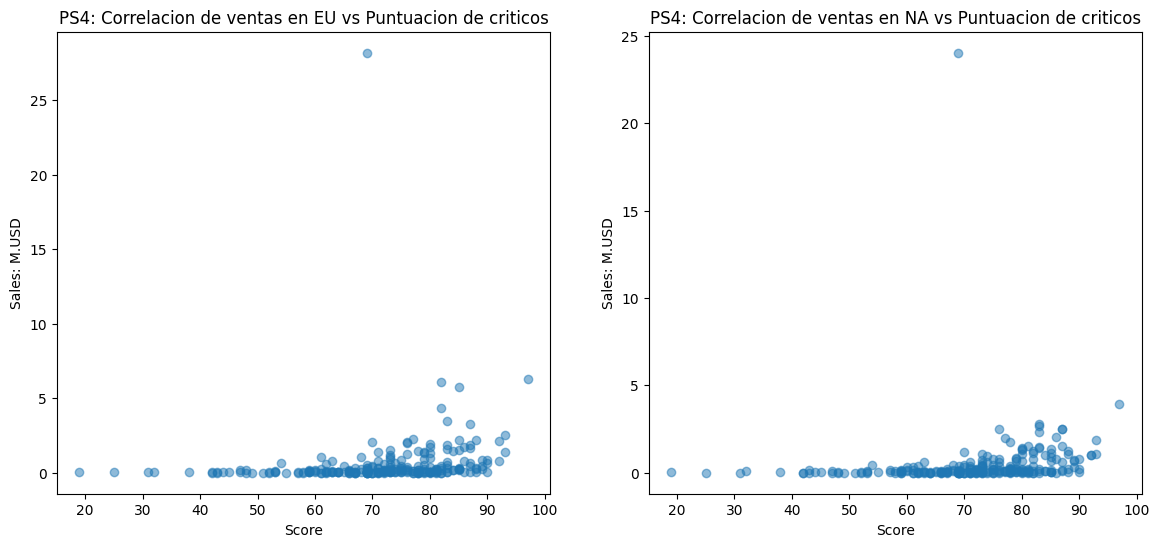

In [342]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(
    ps4_data['critic_score'],
    ps4_data['eu_sales'],
    alpha=0.5
)
plt.xlabel('Score')
plt.ylabel('Sales: M.USD')
plt.title('PS4: Correlacion de ventas en EU vs Puntuacion de criticos')
plt.subplot(1,2,2)
plt.scatter(
    ps4_data['critic_score'],
    ps4_data['na_sales'],
    alpha=0.5
)
plt.title('PS4: Correlacion de ventas en NA vs Puntuacion de criticos')
plt.xlabel('Score')
plt.ylabel('Sales: M.USD')
plt.tight_layout

Hallazgos:
- Los datos muestran una disparidad entre las ventas vs puntuaciones altas de criticos.
- Los datos muestran un pico maximo de ventas alrededor de los 70 puntos. Esto se le puede atribuir a las franquicias establecidas que se mantienen posiblemente gracias a los fans y marketing.

In [343]:
games_platform = games.groupby(['name','platform'])[['eu_sales','na_sales','jp_sales']].sum()
games_platform['total_sales'] = games_platform.sum(axis=1)
games_platform = games_platform.sort_values(by=['name','total_sales'],ascending=[True,False]).reset_index()
print(games_platform[['name','platform','total_sales']].head(50))

                                           name platform  total_sales
0                                Beyblade Burst      3DS         0.03
1                             Fire Emblem Fates      3DS         1.56
2                          Frozen: Olaf's Quest      3DS         0.54
3                          Frozen: Olaf's Quest       DS         0.47
4                    Haikyu!! Cross Team Match!      3DS         0.04
5                             Tales of Xillia 2      PS3         0.77
6                                   '98 Koshien       PS         0.37
7                    .hack//G.U. Vol.1//Rebirth      PS2         0.17
8                  .hack//G.U. Vol.2//Reminisce      PS2         0.20
9       .hack//G.U. Vol.2//Reminisce (jp sales)      PS2         0.16
10                .hack//G.U. Vol.3//Redemption      PS2         0.17
11                      .hack//Infection Part 1      PS2         1.13
12                                  .hack//Link      PSP         0.14
13                  

En esta lista podemos ver los videojuegos exclusivos junto a los multiplataforma

In [344]:
multiplatform_games = (
    games_platform.groupby('name')
    .filter(lambda x: len(x) > 1)  # Juegos con 2+ plataformas
    .sort_values(['name', 'total_sales'], ascending=[True, False])
)
print(multiplatform_games[['name','total_sales','platform']].head(50))

                                                  name  total_sales platform
2                                 Frozen: Olaf's Quest         0.54      3DS
3                                 Frozen: Olaf's Quest         0.47       DS
18                              007: Quantum of Solace         1.34     X360
19                              007: Quantum of Solace         0.96      PS3
20                              007: Quantum of Solace         0.58      Wii
21                              007: Quantum of Solace         0.17      PS2
22                              007: Quantum of Solace         0.12       DS
23                              007: Quantum of Solace         0.02       PC
24                        007: The World is not Enough         1.53      N64
25                        007: The World is not Enough         0.86       PS
40                                   11eyes: CrossOver         0.02      PSP
41                                   11eyes: CrossOver         0.02     X360

- Los videojuegos difieren mucho en multiples plataformas, a pesar de tener el mismo titulo.
- Las plataformas con mayor presencia son PS2 y PS3.
- Cada plataforma lidera en generos diferentes.


In [345]:
games_genre = games.groupby('genre')[['eu_sales','na_sales','jp_sales']].sum()
games_genre['total_sales'] = games_genre.sum(axis=1)
games_genre = games_genre.sort_values(by='total_sales',ascending=False).reset_index()
print(games_genre[['genre','total_sales']].head(50))

           genre  total_sales
0         Action      1559.57
1         Sports      1196.76
2        Shooter       948.34
3   Role-Playing       874.93
4       Platform       776.68
5           Misc       728.12
6         Racing       652.57
7       Fighting       411.17
8     Simulation       359.24
9         Puzzle       230.19
10     Adventure       221.10
11      Strategy       163.38
12       unknown         2.34


<Axes: title={'center': 'Ventas por genero'}, xlabel='Genre', ylabel='Sales: M.USD'>

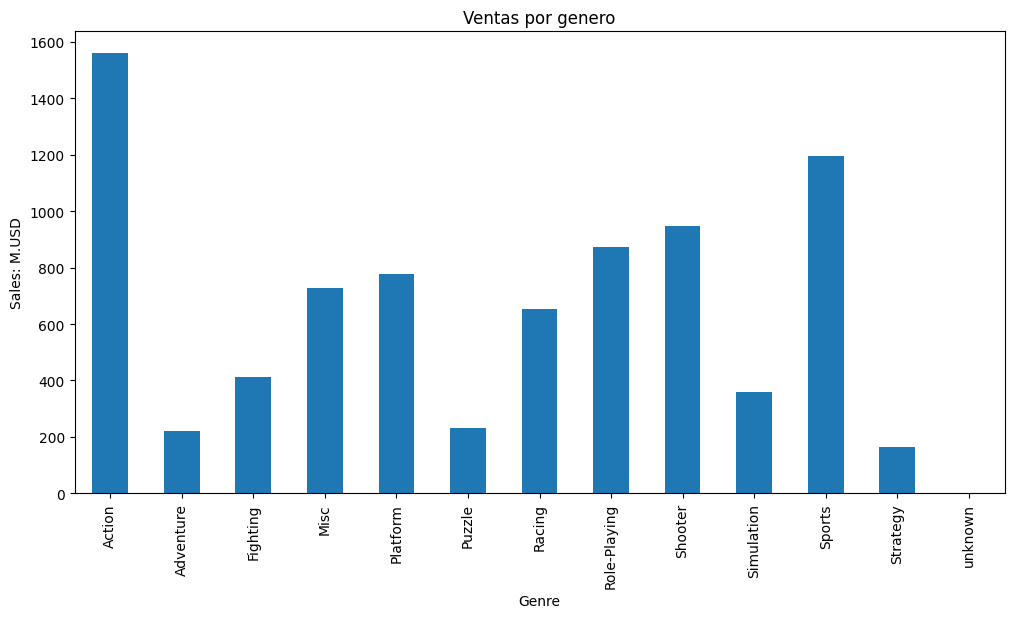

In [346]:
games_genre.groupby('genre')['total_sales'].sum().plot(
    kind='bar',
    figsize=(12,6),
    xlabel='Genre',
    ylabel='Sales: M.USD',
    title='Ventas por genero'
)

Los generos mas rentables son:
- Action
- Sports
- Shooters

Mientras que los menos rentables son:
- Puzzle
- Adventure
- Strategy

Lo que se podria generalizar de las ventas por genero, es que cada genero esta enfocado en una plataforma, PlayStation lidera en ventas de juegos de Action y Sports, Xbox lidera en Shooter.
Los generos mainstream (juegos que atraen a publico masivo), son liderados por XBOX y PlayStation. Para juegos de rol, son liderados por plataformas como 3DS, Wii. Otros generos se distribuyen entre todas las plataformas teniendo un titulo diferente para cada una, pero un genero en comun.

In [347]:
profile_region = games.groupby('genre')[['eu_sales','na_sales','jp_sales']].sum()
profile_region = profile_region.reset_index()
print(profile_region.head(20))

           genre  eu_sales  na_sales  jp_sales
0         Action    519.13    879.01    161.43
1      Adventure     63.54    105.26     52.30
2       Fighting    100.33    223.36     87.48
3           Misc    212.74    407.27    108.11
4       Platform    200.35    445.50    130.83
5         Puzzle     50.01    122.87     57.31
6         Racing    236.51    359.35     56.71
7   Role-Playing    188.71    330.81    355.41
8        Shooter    317.34    592.24     38.76
9     Simulation    113.52    181.92     63.80
10        Sports    376.79    684.43    135.54
11      Strategy     45.17     68.55     49.66
12       unknown      0.53      1.78      0.03


Paso 4. Crea un perfil de usuario para cada region

([<matplotlib.axis.XTick at 0x20560b90580>,
 [Text(0.2, 0, 'Action'),
  Text(1.2, 0, 'Adventure'),
  Text(2.2, 0, 'Fighting'),
  Text(3.2, 0, 'Misc'),
  Text(4.2, 0, 'Platform'),
  Text(5.2, 0, 'Puzzle'),
  Text(6.2, 0, 'Racing'),
  Text(7.2, 0, 'Role-Playing'),
  Text(8.2, 0, 'Shooter'),
  Text(9.2, 0, 'Simulation'),
  Text(10.2, 0, 'Sports'),
  Text(11.2, 0, 'Strategy'),
  Text(12.2, 0, 'unknown')])

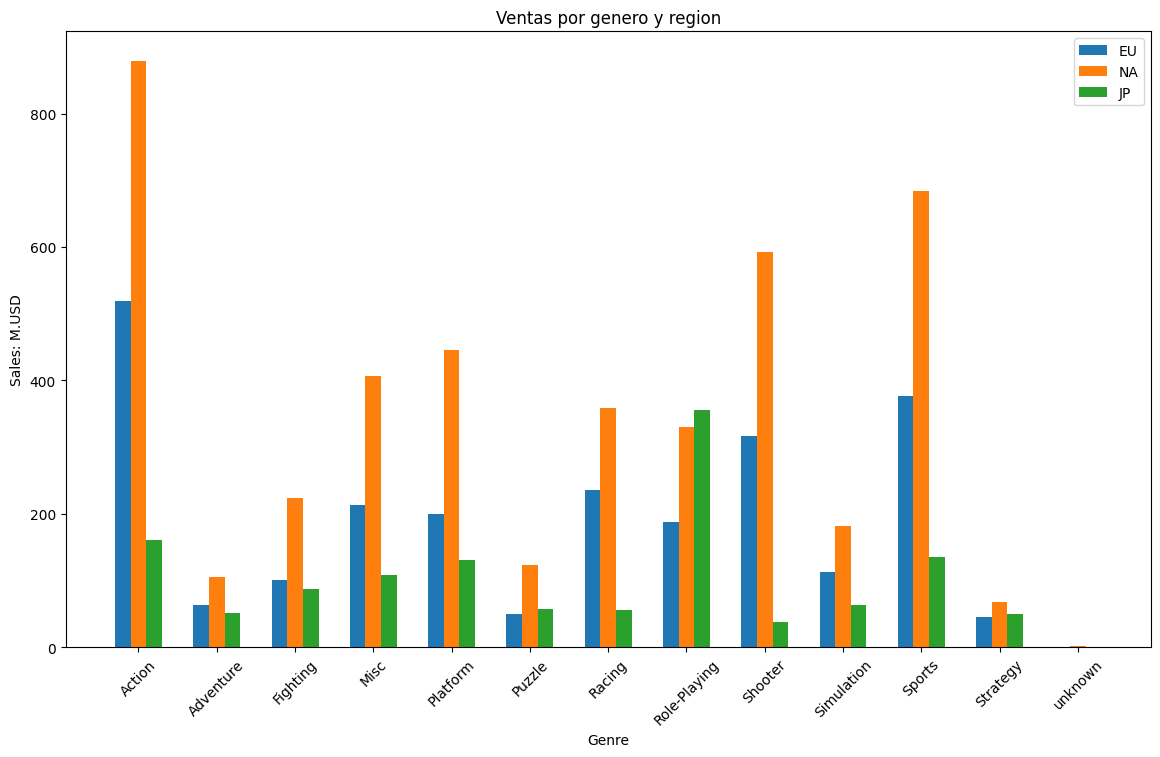

In [348]:
plt.figure(figsize=(14,8))
bar_width = 0.20
index = np.arange(len(profile_region['genre'])) # de posiciones en el eje x para cada genero
plt.bar(index, profile_region['eu_sales'], bar_width, label='EU')
plt.bar(index + bar_width, profile_region['na_sales'], bar_width, label='NA')
plt.bar(index + 2*bar_width, profile_region['jp_sales'], bar_width, label='JP')

plt.legend()
plt.xlabel('Genre')
plt.ylabel('Sales: M.USD')
plt.title('Ventas por genero y region')
plt.xticks(index+bar_width, profile_region['genre'],rotation=45)

In [349]:
top_platform_region = games.groupby('platform')[['eu_sales','na_sales','jp_sales']].sum()

top5_eu = top_platform_region.sort_values('eu_sales',ascending=False).head(5)
top5_na = top_platform_region.sort_values('na_sales',ascending=False).head(5)
top5_jp = top_platform_region.sort_values('jp_sales',ascending=False).head(5)
print("El top 5 de plataformas mas vendidas en EU son:")
print(top5_eu['eu_sales'])
print("El top 5 de plataformas mas vendidas en NA son:")
print(top5_na['na_sales'])
print("El top 5 de plataformas mas vendidas en JP son:")
print(top5_jp['jp_sales'])

El top 5 de plataformas mas vendidas en EU son:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
El top 5 de plataformas mas vendidas en NA son:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
El top 5 de plataformas mas vendidas en JP son:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [350]:
top_platform_region = games.groupby('genre')[['eu_sales','na_sales','jp_sales']].sum()

top5_eu_1 = top_platform_region.sort_values('eu_sales',ascending=False).head(5)
top5_na_1 = top_platform_region.sort_values('na_sales',ascending=False).head(5)
top5_jp_1 = top_platform_region.sort_values('jp_sales',ascending=False).head(5)
print("El top 5 de generos mas vendidos en EU son:")
print(top5_eu_1['eu_sales'])
print("El top 5 de generos mas vendidos en NA son:")
print(top5_na_1['na_sales'])
print("El top 5 de generos mas vendidos en JP son:")
print(top5_jp_1['jp_sales'])

El top 5 de generos mas vendidos en EU son:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
El top 5 de generos mas vendidos en NA son:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
El top 5 de generos mas vendidos en JP son:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Paso 5. Prueba de hipotesis

Afirmacion:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Hipotesis nula:
- No hay diferencia entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC

Hipotesis alternativa:
- Existe una diferencia significativa entre ambas plataformas.

¿Por que?
- La afirmacion sugiere igualdad, lo que la convierte en la hipotesis nula.

In [360]:
xbox_one_scores = games[games['platform']=='XOne']['user_score']
pc_scores = games[games['platform']=='PC']['user_score']

alpha = 0.05 # propuesta de umbral

valor_p = levene(xbox_one_scores, pc_scores)

if valor_p.pvalue > alpha:
    print(f"Varianzas iguales: {valor_p.pvalue:.2f} equal_var=True")
    prueba_t = stats.ttest_ind(xbox_one_scores,pc_scores,equal_var=True)
    if prueba_t.pvalue <= alpha:
        print(f"Rechazamos la hipotesis nula, valor p: {prueba_t.pvalue:.2f}")
    else:
        print(f"No podemos rechazar la hipotesis nula: valor p: {prueba_t.pvalue:.2f}")
else:
    print(f"Varianzas desiguales: {valor_p.pvalue:.2f} equal_var=False")

Varianzas iguales: 0.99 equal_var=True
Rechazamos la hipotesis nula, valor p: 0.00


Los resultados indican que aunque las varianzas son muy similares y que su hay diferencias significativas entre ambos promedios.

Explicacion:
- Escogi ttest_ind porque estamos hablando de grupos independientes, es decir, son usuarios diferentes los que califican dichas plataformas, usaria ttest_rel o ttest_dep solo si fueran los mismos usuarios los que califican ambas plataformas.
- Use la prueba de homocedasticidad (varianzas) para verificar que no existan falsos positivos o negativos, es decir, con la varianza se busca ver que tan dispersos estan los datos alrededor de la media, entonces al usar equal_var = True o False, lo que busco es ajustar los parametros para evitar errores estadisticos.

Afirmacion:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes
son diferentes

Hipotesis nula:
- No hay diferencia entre las calificaciones promedio de los usuarios para los generos de accion y deportes

Hipotesis alternativa:
- Existe una diferencia significativa entre las calificaciones promedio de ambos generos.

¿Por que?
- Porque la afirmacion sugiere diferencias, y la hipotesis nula siempre sugiere igualdad o sin efecto, por lo que la afirmacion seria la alternativa.

In [361]:
action_scores = games[games['genre']=='Action']['user_score']
sports_scores = games[games['genre']=='Sports']['user_score']

alpha = 0.05 # propuesta de umbral

valor_p1 = levene(action_scores, sports_scores)

if valor_p1.pvalue > alpha:
    print(f"Varianzas iguales: {valor_p1.pvalue:.2f} equal_var=True")
    prueba_t_1 = stats.ttest_ind(action_scores,sports_scores,equal_var=True)
    if prueba_t_1.pvalue <= alpha:
        print(f"Rechazamos la hipotesis nula, valor p: {prueba_t_1.pvalue:.2f}")
    else:
        print(f"No podemos rechazar la hipotesis nula, valor p: {prueba_t_1.pvalue:.2f}")
else:
    print(f"Varianzas desiguales: {valor_p1.pvalue:.2f} equal_var=False")

Varianzas iguales: 0.68 equal_var=True
No podemos rechazar la hipotesis nula, valor p: 0.71


Los resultados indican que las varianzas son iguales o al menos muy similares, ademas, igualmente los promedios son muy similares, no difieren entre ambos generos. Los usuarios califican de forma similar a ambos generos.

Explicacion:
- Use la misma logica que en la prueba de hipotesis anterior.

Conclusion general

El análisis evidencia que, para que una plataforma tenga éxito, es fundamental realizar un estudio previo del mercado y la región a la que se dirige. No basta con lanzar videojuegos populares en un área y esperar el mismo resultado en otra, ya que los datos muestran diferencias claras en las preferencias. Por ejemplo, mientras que en Europa y Norteamérica los géneros de acción, deportes o shooter suelen dominar las ventas, en Japón estos géneros no alcanzan la misma popularidad. En ese mercado, plataformas como Wii o 3DS destacan por su orientación al entretenimiento familiar, lo que sugiere un consumo más colectivo, a diferencia del enfoque individual que predomina en Occidente. Las cifras de ventas y la dispersión por género y plataforma refuerzan la importancia de adaptar tanto el catálogo como la estrategia de lanzamiento a las características de cada región.